# Vulnerability curves for Western Australian communities

For the Severe Wind Hazard Assessment project (2018-2020), GA is analysing the impacts of severe tropical cyclones on Queensland communities. Part of this work relies on an understanding of the vulnerability to severe winds of residential buildings in those communities. 

There are subtle differences in the construction and design of residential buildings in the communities along the Queensland coast and for this reason, GA engaged the services of James Cook University's Cyclone Testing Station (CTS) to refine the suite of heuristic wind vulnerability curves. 

The heuristic vulnerability models contained in the CTS report (JCU, 2018(b)) represent the best available opinion on the vulnerability of house types in the study areas with which JCU had some experience. They were adjusted to account for wind-borne debris damage that might be incurred by houses situated within suburban environments as opposed to single isolated houses. However, for some house types, there is little or no data or experience available to inform the assessment of vulnerability. In these cases, vulnerability models from Geoscience Australia (2013) were used without modification.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_palette("Paired", 10)

import pandas as pd

vuln_file = "X:/georisk/HaRIA_B_Wind/projects/qfes_swha/data/derived/vulnerability/domestic_wind_vul_curves_wJCU.csv"
#vuln_file = "E:/Work/DFES/data/vulnerability/swha_domestic_wind_vul_curves.csv"
df = pd.read_csv(vuln_file)
regions = pd.unique(df['Region'])


In [3]:
def plotCurves(df, region, as4055, units='m/s'):
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    iml = df['IML'].dropna().values
    if units == 'km/h':
        iml *= 3.6
        
    subsdf = df[(df.Region==region) &
                #(df.Age == age) &
                (df['AS4055 class.'] == as4055)]
    for idx, row in subsdf.iterrows():
        if (np.isnan(row[-37])):
            continue
        label = '{0} {1}, {2}'.format(row['Region'], row['Age'], row['AS4055 class.'])
        ax.plot(iml, row[-38:].values, label=label, lw=2, ls='-.')
        
    ax.grid(True, which='both')
    ax.legend(fontsize='xx-small')
    xlabel = "0.2 second gust wind speed ({0})".format(units)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Damage index")
    ax.set_title("{0}".format(region))
    fig.tight_layout()
    plt.savefig("X:/georisk/HaRIA_B_Wind/projects/qfes_swha/data/derived/vulnerability/{0} vulnerability.png".format(region))

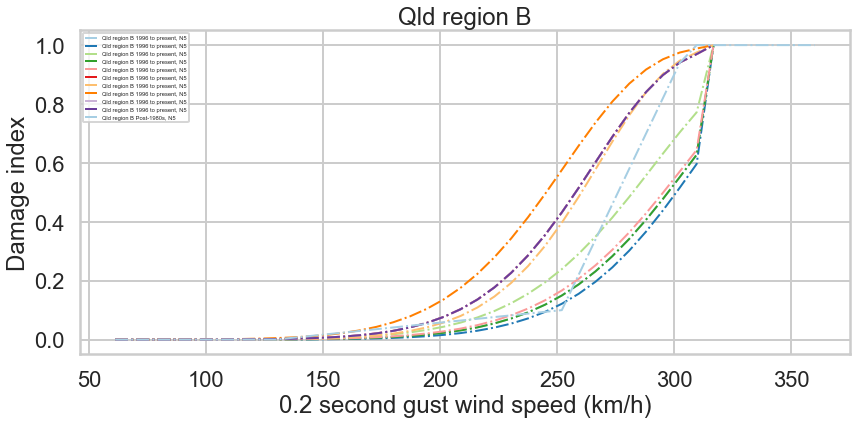

In [8]:
plotCurves(df, 'Qld region B', "N5", units='km/h')